[Reference](https://pub.towardsai.net/time-series-data-analysis-in-python-1492ee4ca974)

In [2]:
import pandas as pd

In [18]:
# Compute correlation of levels
# data used is levels
levels = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/DJI.csv', parse_dates=['Date'], index_col='Date')

correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9204594155244163
Correlation of changes:  0.009287288259357323


In [5]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y

data = pd.read_csv('asset.csv', parse_dates=['DATE'], index_col='DATE')
data = data.dropna()
x = data['SP500']
y = data['Oil']

correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x.values, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y.values, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

In [6]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=0.05)
plt.show()

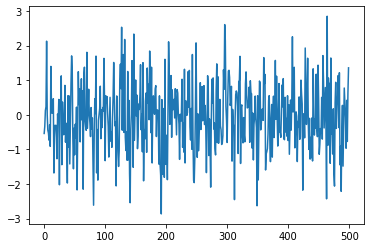

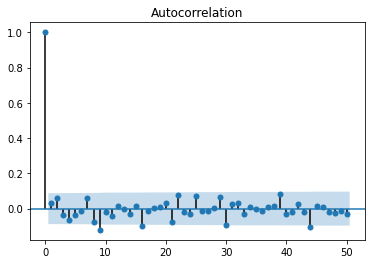

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

noise = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noise)
plt.show()
plot_acf(noise, lags=50)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
data = pd.read_csv('asset.csv', parse_dates=['DATE'], index_col='DATE')
data = data.dropna()
SPX = data['SP500']
results = adfuller(SPX)
print(results[1]) # print the p-value 

In [12]:
# Transforming Nonstationary Series Into Stationary Series
fig, axs = plt.subplots(2)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(HRB)
axs[0].set_title('Quarterly earnings for H&R Block')

axs[1].plot(HRB.diff(4))
axs[1].set_title('Quarterly earnings for H&R Block seasonal difference')

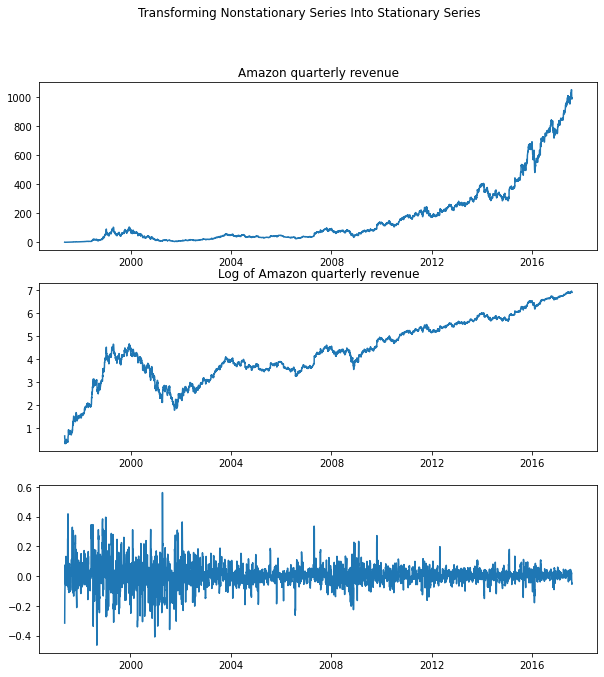

In [14]:
# Transforming Nonstationary Series Into Stationary Series
AMZN =  pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/AMZN.csv', parse_dates=['Date'], index_col='Date')

fig, axs = plt.subplots(3)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(AMZN)
axs[0].set_title('Amazon quarterly revenue')
axs[1].plot(np.log(AMZN))
axs[1].set_title('Log of Amazon quarterly revenue')

axs[2].plot(np.log(AMZN).diff(4))

Text(0.5, 1.0, 'Simulated data with Phi = -0.5')

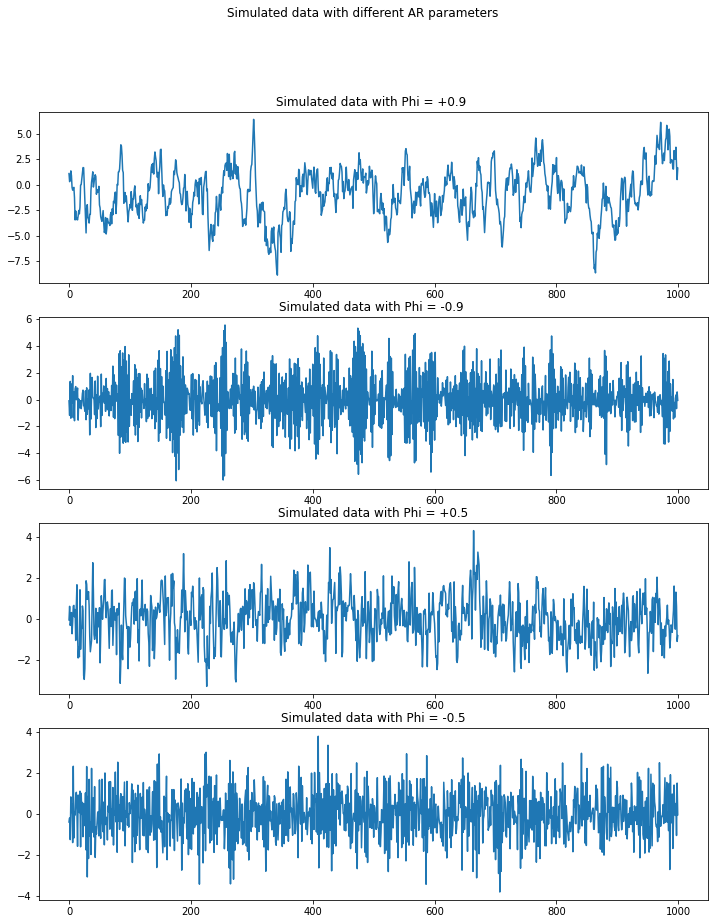

In [15]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

fig, axs = plt.subplots(4)
fig.set_size_inches(12, 14.5)
fig.suptitle('Simulated data with different AR parameters')

# Plot 1: AR parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
axs[0].plot(simulated_data_1)
axs[0].set_title('Simulated data with Phi = +0.9 ')

# Plot 2: AR parameter = -0.9
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
axs[1].plot(simulated_data_2)
axs[1].set_title('Simulated data with Phi = -0.9 ')


# Plot 3: AR parameter = +0.5
ar3 = np.array([1, -0.5])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
axs[2].plot(simulated_data_3)
axs[2].set_title('Simulated data with Phi = +0.5')


# Plot 3: AR parameter = -0.5
ar4 = np.array([1, 0.5])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
axs[3].plot(simulated_data_4)
axs[3].set_title('Simulated data with Phi = -0.5')

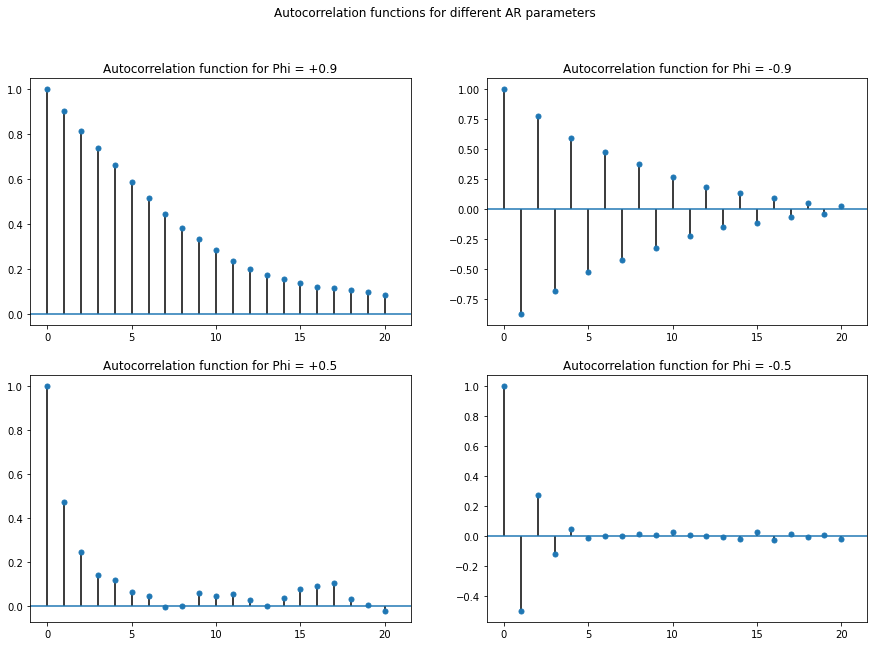

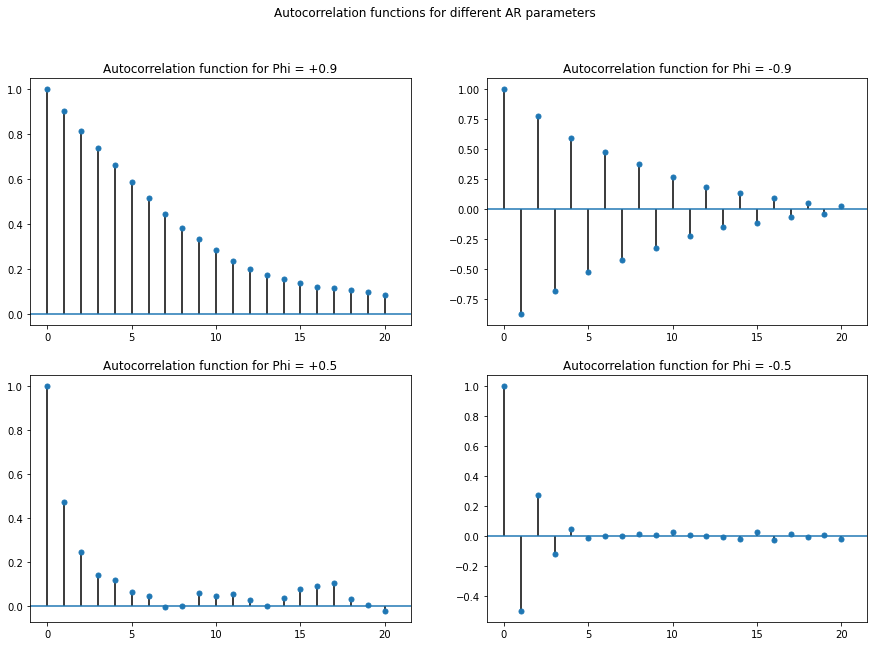

In [16]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Autocorrelation functions for different AR parameters')

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1 , alpha=1, lags=20, ax=axs[0,0], title='Autocorrelation function for Phi = +0.9')

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2 , alpha=1, lags=20, ax=axs[0,1], title='Autocorrelation function for Phi = -0.9')

# Plot 3: AR parameter = +0.5
plot_acf(simulated_data_3, alpha=1, lags=20,  ax=axs[1,0], title='Autocorrelation function for Phi = +0.5')

# Plot 4: AR parameter = -0.5
plot_acf(simulated_data_4, alpha=1, lags=20,  ax=axs[1,1], title='Autocorrelation function for Phi = -0.5')

In [20]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(simulated_data_1, order=(1,0,0))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1441.135
Method:                       css-mle   S.D. of innovations              1.022
Date:                Sun, 22 May 2022   AIC                           2888.270
Time:                        08:53:38   BIC                           2902.993
Sample:                             0   HQIC                          2893.866
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8001      0.330     -2.426      0.015      -1.447      -0.154
ar.L1.y        0.9029      0.014     66.746      0.000       0.876       0.929
                                    Roots           

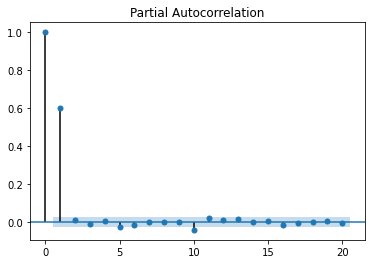

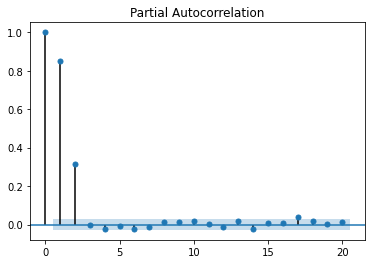

In [21]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

In [22]:
mod = ARIMA(simulated_data_2, order=(2,0,0))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(2, 0)   Log Likelihood               -7161.414
Method:                       css-mle   S.D. of innovations              1.013
Date:                Sun, 22 May 2022   AIC                          14330.827
Time:                        08:53:59   BIC                          14356.896
Sample:                             0   HQIC                         14339.964
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1444      0.137     -1.050      0.294      -0.414       0.125
ar.L1.y        0.5801      0.013     43.241      0.000       0.554       0.606
ar.L2.y        0.3159      0.013     23.542      0.0

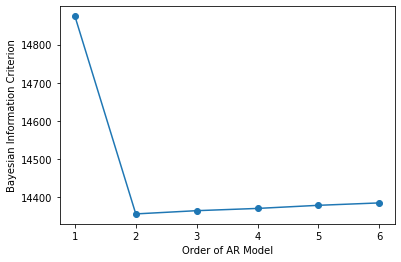

In [24]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

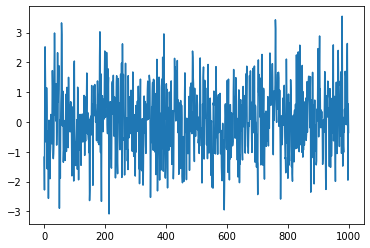

In [25]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [27]:
from statsmodels.tsa.arima_model import ARIMA

mod = ARIMA(simulated_data, order=(0,0,1))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1398.081
Method:                       css-mle   S.D. of innovations              0.979
Date:                Sun, 22 May 2022   AIC                           2802.162
Time:                        08:54:48   BIC                           2816.885
Sample:                             0   HQIC                          2807.758
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.046      0.901      0.368      -0.049       0.131
ma.L1.y        0.4830      0.028     17.488      0.000       0.429       0.537
                                    Roots           

In [29]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

#upload the data 
temp_NY = pd.read_csv('New York temperature data.csv', parse_dates=['DATE'], index_col='DATE' )

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['AVG'])
print("The p-value for the ADF test is ", result[1])

In [30]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

In [31]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1,0,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2,0,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1,0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)